In [1]:
import qstrader

In [2]:
import os

import pandas as pd
import pytz

# alpha signal
from qstrader.alpha_model.fixed_signals import FixedSignalsAlphaModel

# asset types and universe
from qstrader.asset.equity import Equity
from qstrader.asset.universe.static import StaticUniverse

# data reader and provider
from qstrader.data.backtest_data_handler import BacktestDataHandler
from qstrader.data.daily_bar_csv import CSVDailyBarDataSource

# stats generator
from qstrader.statistics.tearsheet import TearsheetStatistics

# main thing
from qstrader.trading.backtest import BacktestTradingSession

In [3]:
start_dt = pd.Timestamp('2003-09-30 14:30:00', tz=pytz.UTC)
end_dt = pd.Timestamp('2019-12-31 23:59:00', tz=pytz.UTC)

# Construct the symbols and assets necessary for the backtest
strategy_symbols = ['SPY', 'AGG']
strategy_assets = ['EQ:%s' % symbol for symbol in strategy_symbols]
strategy_universe = StaticUniverse(strategy_assets)

In [4]:
os.environ["QSTRADER_CSV_DATA_DIR"] = '/Users/snk/pcode/archive/qstrader/data'

In [5]:
# To avoid loading all CSV files in the directory, set the
# data source to load only those provided symbols
csv_dir = os.environ.get('QSTRADER_CSV_DATA_DIR', '.')
data_source = CSVDailyBarDataSource(csv_dir , Equity, csv_symbols=strategy_symbols)
data_handler = BacktestDataHandler(strategy_universe, data_sources=[data_source])

Loading CSV files into DataFrames...
Loading CSV file for symbol 'EQ:SPY'...
Loading CSV file for symbol 'EQ:AGG'...
Adjusting pricing in CSV files...
Adjusting CSV file for symbol 'EQ:SPY'...
Adjusting CSV file for symbol 'EQ:AGG'...


In [6]:
# Construct an Alpha Model that simply provides
# static allocations to a universe of assets
# In this case 60% SPY ETF, 40% AGG ETF,
# rebalanced at the end of each month
strategy_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 0.6, 'EQ:AGG': 0.4})
strategy_backtest = BacktestTradingSession(
    start_dt,
    end_dt,
    strategy_universe,
    strategy_alpha_model,
    rebalance='end_of_month',
    long_only=True,
    cash_buffer_percentage=0.01,
    data_handler=data_handler
)
strategy_backtest.run(results = False)

Initialising simulated broker "Backtest Simulated Broker Account"...
(2003-09-30 14:30:00+00:00) - portfolio creation: Portfolio "000001" created at broker "Backtest Simulated Broker Account"
(2003-09-30 14:30:00+00:00) - subscription: 1000000.00 subscribed to portfolio "000001"
Beginning backtest simulation...
(2003-09-30 14:30:00+00:00) - market_open
(2003-09-30 21:00:00+00:00) - market_close
(2003-09-30 21:00:00+00:00) - trading logic and rebalance
(2003-09-30 21:00:00+00:00) - target weights: {'EQ:AGG': 0.4, 'EQ:SPY': 0.6}
(2003-09-30 21:00:00+00:00) - submitted order: EQ:AGG, qty: 7565
(2003-09-30 21:00:00+00:00) - submitted order: EQ:SPY, qty: 8866
(2003-10-01 14:30:00+00:00) - market_open
(2003-10-01 14:30:00+00:00) - executed order: EQ:AGG, qty: 7565, price: 52.32, consideration: 395765.00, commission: 0.00, total: 395765.00
(2003-10-01 14:30:00+00:00) - executed order: EQ:SPY, qty: 8866, price: 67.19, consideration: 595676.00, commission: 0.00, total: 595676.00
(2003-10-01 21:

In [7]:
list(strategy_backtest.stats.keys())

['dates',
 'events',
 'alpha_weights',
 'risk_weights',
 'optimised_weights',
 'target_portfolio',
 'current_portfolio',
 'rebalance_orders',
 'executed_orders',
 'equity_curve',
 'portfolio_snapshots']

In [11]:
stats = strategy_backtest.get_stats_dataframe()

/Users/snk/pcode/archive/qstrader/qstrader/trading/backtest.py:446: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  stats_dfs['portfolio_snapshots'] = pd.concat(df_list)


In [12]:
stats['portfolio_snapshots']

,Asset,NetQuantity,MarketValue,CurrentPrice
Date,,,,
2003-09-30 14:30:00+00:00,Cash,NaN,1.000000e+06,NaN
2003-09-30 21:00:00+00:00,Cash,NaN,1.000000e+06,NaN
2003-10-01 14:30:00+00:00,EQ:AGG,7565.0,3.957653e+05,52.315306
2003-10-01 14:30:00+00:00,EQ:SPY,8866.0,5.956759e+05,67.186547
2003-10-01 14:30:00+00:00,Cash,NaN,8.558781e+03,NaN
...,...,...,...,...
2019-12-31 14:30:00+00:00,EQ:SPY,6546.0,1.945283e+06,297.171234
2019-12-31 14:30:00+00:00,Cash,NaN,3.216524e+04,NaN
2019-12-31 21:00:00+00:00,EQ:AGG,12873.0,1.264854e+06,98.256340


Initialising simulated broker "Backtest Simulated Broker Account"...
(2003-09-30 14:30:00+00:00) - portfolio creation: Portfolio "000001" created at broker "Backtest Simulated Broker Account"
(2003-09-30 14:30:00+00:00) - subscription: 1000000.00 subscribed to portfolio "000001"
Beginning backtest simulation...
(2003-09-30 14:30:00+00:00) - market_open
(2003-09-30 14:30:00+00:00) - trading logic and rebalance
(2003-09-30 14:30:00+00:00) - target weights: {'EQ:SPY': 1.0}
(2003-09-30 14:30:00+00:00) - submitted order: EQ:SPY, qty: 14699
(2003-09-30 14:30:00+00:00) - executed order: EQ:SPY, qty: 14699, price: 67.35, consideration: 989940.00, commission: 0.00, total: 989940.00
(2003-09-30 21:00:00+00:00) - market_close
(2003-10-01 14:30:00+00:00) - market_open
(2003-10-01 21:00:00+00:00) - market_close
(2003-10-02 14:30:00+00:00) - market_open
(2003-10-02 21:00:00+00:00) - market_close
(2003-10-03 14:30:00+00:00) - market_open
(2003-10-03 21:00:00+00:00) - market_close
(2003-10-06 14:30:00

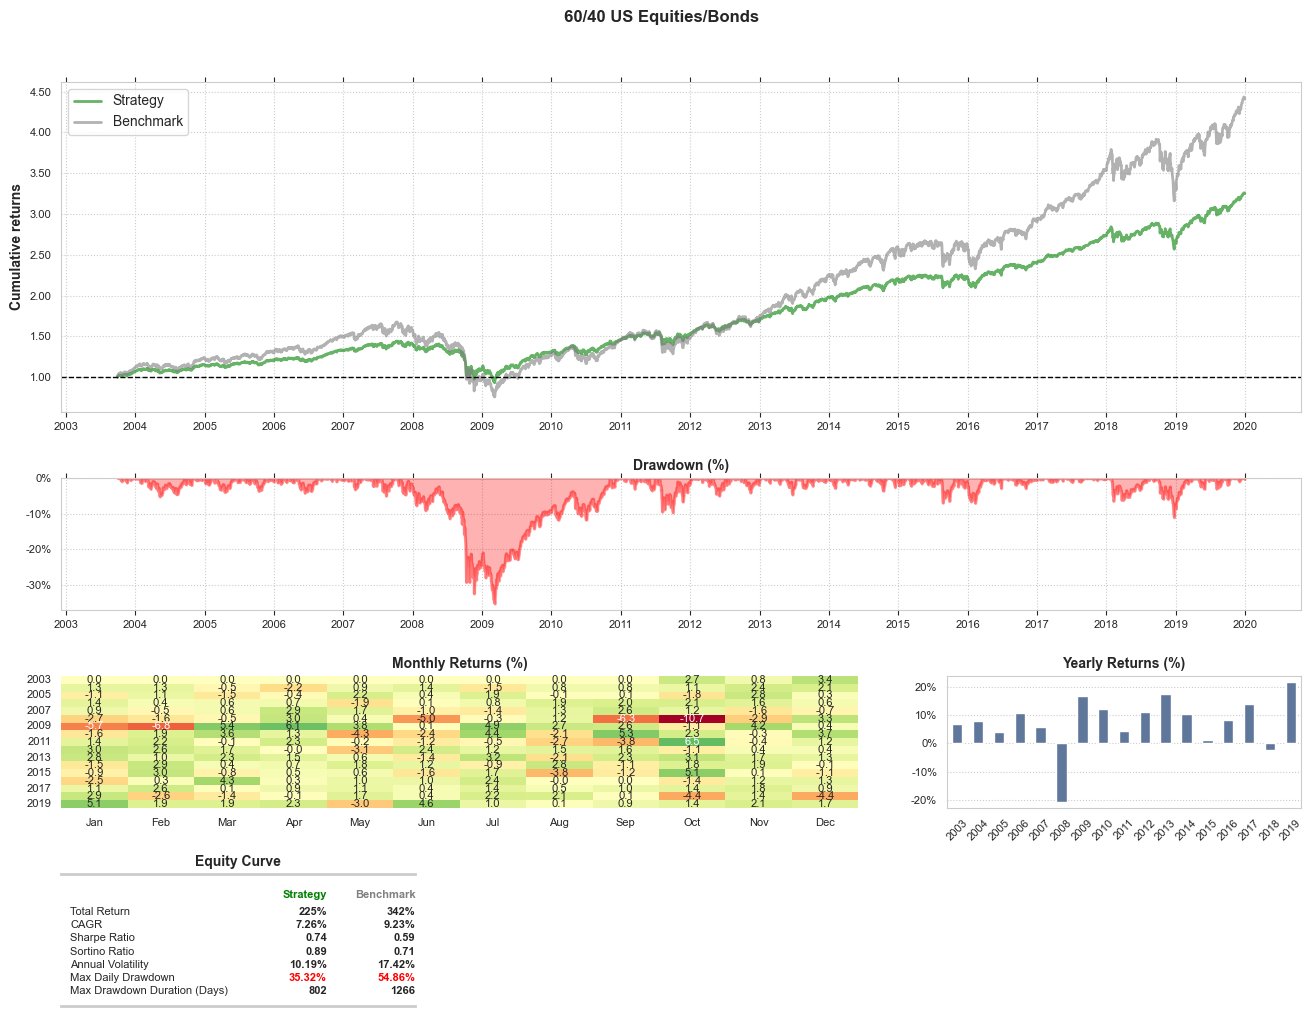

In [13]:
# Construct benchmark assets (buy & hold SPY)
benchmark_assets = ['EQ:SPY']
benchmark_universe = StaticUniverse(benchmark_assets)

# Construct a benchmark Alpha Model that provides
# 100% static allocation to the SPY ETF, with no rebalance
benchmark_alpha_model = FixedSignalsAlphaModel({'EQ:SPY': 1.0})
benchmark_backtest = BacktestTradingSession(
    start_dt,
    end_dt,
    benchmark_universe,
    benchmark_alpha_model,
    rebalance='buy_and_hold',
    long_only=True,
    cash_buffer_percentage=0.01,
    data_handler=data_handler
)
benchmark_backtest.run()

# Performance Output
tearsheet = TearsheetStatistics(
    strategy_equity=strategy_backtest.get_equity_curve(),
    benchmark_equity=benchmark_backtest.get_equity_curve(),
    title='60/40 US Equities/Bonds'
)
tearsheet.plot_results()